Ashton Carter

Download the data using this link: download the data. (Note: Original data source)

Explore the data - what do you need to do to clean this data?

Are there missing values in this dataset? Some stores might not report all the data due to technical glitches or other issues. If so, deal with these appropriately.

Here are a few resources to help you consider more advanced ways to deal with missing values in your dataset (check out the optional additional 

Pandas resources at the end of this Chapter for more resources on this):

Missing Data, its types, and statistical methods to deal with it
6 Different Ways to Compensate for Missing Values In a Dataset

Dealing with missing data: Key assumptions and methods for applied analysis

Feel free to use any other resources or techniques you find online that you think are appropriate/useful

What are some summary statistics, aggregate information, or other useful trends you can see from the data using Pandas?

Commit your work to GitHub. Watch this video if you are unsure of how to do this:

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

file_path = ('/content/drive/MyDrive/Panda_eat_bamboo/sales_predictions.csv')

sales = pd.read_csv(file_path)

sales.info()
sales.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
sales['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [ ]:


# decided to fill missing values with 0 and add a flag to the row so that the other data wouldn't be lost.  The flag will be able to alert the future model to treat this data differently
sales['Missing_Item_Weight'] = sales['Item_Weight'].isnull()

# created a separate class of "missing" so that other data wouldn't be lost.  
sales['Item_Weight'] = sales.loc[:,'Item_Weight'].fillna(0)
sales['Outlet_Size'] = sales.loc[:,'Outlet_Size'].fillna('Missing')



In [ ]:
#Testing to see that na values are gone
sales.info()
sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Missing_Item_Weight        8523 non-null   bool   
dtypes: bool(1), float64(4), int64(1), object(7)
memo

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Missing_Item_Weight
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,False
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,False
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,False
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800,False
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,False


In [ ]:

#consolidating data entries that are presumably the same

sales['Item_Fat_Content'] = sales['Item_Fat_Content'].str.replace('LF','Low Fat')
sales['Item_Fat_Content'] = sales['Item_Fat_Content'].str.replace('low fat','Low Fat')
sales['Item_Fat_Content'] = sales['Item_Fat_Content'].str.replace('reg','Regular')


sales.groupby(['Item_Fat_Content'])[['Item_Outlet_Sales']].mean()

,Item_Outlet_Sales
Item_Fat_Content,
Low Fat,2157.711534
Regular,2224.561170


In [ ]:
# Checking that only two types remain
sales['Item_Fat_Content'].unique()
#item_fat_viz = sales.loc[:,:].groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].sum().sort_values(ascending = False)
#item_fat_viz.head()

Item_Fat_Content
Regular    6.687031e+06
Low Fat    1.190409e+07
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
outlet_size_viz = sales.loc[:,:].groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum().sort_values(ascending = False)
#sales.groupby(['Outlet_Size'])[['Item_Outlet_Sales']].sum()
#outlet_size_viz.values

# various pairings of data output to see if any trends emerge. will graph below
item_fat_viz = sales.loc[:,:].groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].sum().sort_values(ascending = False)
item_type_viz = sales.loc[:,:].groupby(['Item_Type'])['Item_Outlet_Sales'].sum().sort_values(ascending = False)
item_MRP_viz = sales.loc[:,:].groupby(['Item_MRP'])['Item_Outlet_Sales'].sum().sort_values(ascending = False)
item_ID_viz = sales.loc[:,:].groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum()
item_estab_viz = sales.loc[:,:].groupby(['Outlet_Establishment_Year'])['Item_Outlet_Sales'].sum().sort_values(ascending = False)
item_otype_viz = sales.loc[:,:].groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum().sort_values(ascending = False)
item_missing_viz = sales.loc[:,:].groupby(['Missing_Item_Weight'])['Item_Outlet_Sales'].sum().sort_values(ascending = False)
item_viz_viz = sales.loc[:,:].groupby(['Item_Visibility'])['Item_Outlet_Sales']

<BarContainer object of 4 artists>

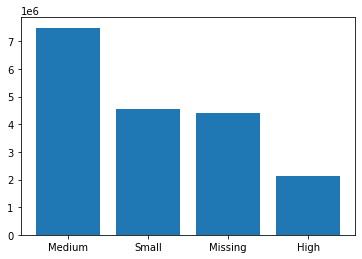

In [ ]:
plt.bar(outlet_size_viz.index, outlet_size_viz.values)

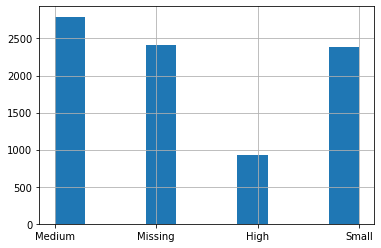

In [ ]:
#plt.bar(outlet_size_viz.index, outlet_size_viz.values)
# shows that the basic distribution of outlet size counts and outlet size compared to sales is similar
sales['Outlet_Size'].hist();




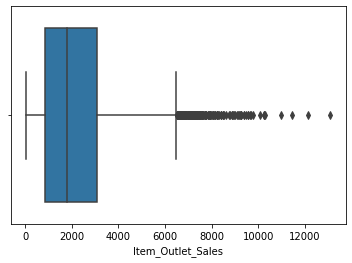

In [ ]:
sb.boxplot(x = sales['Item_Outlet_Sales']);
#plt.scatter(sales[''])

In [ ]:
outliers = sales['Item_Outlet_Sales'] > 6000
outliers = sales[outliers]
outliers['Item_Outlet_Sales'].describe()
#sb.boxplot(x = outliers['Item_Outlet_Sales']);

count      289.000000
mean      7137.829850
std       1128.248513
min       6002.852800
25%       6327.763200
50%       6796.486400
75%       7534.192800
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

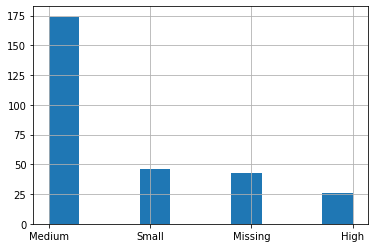

In [ ]:
#higher ratio of medium : others than original data set
outliers['Outlet_Size'].hist()

In [ ]:
#small = sales['Outlet_Size'] == 'Small'
#medium = sales['Outlet_Size'] == 'Medium'
#high = sales['Outlet_Size'] == 'High'
#missing = sales['Outlet_Size'] == 'Missing'


small = sa['les.loc[sales['Outlet_Size'] == 'Small',:]
medium = sales.loc[sales['Outlet_Size'] == 'Medium',:]
high = sales.loc[sales['Outlet_Size'] == 'High',:]
missing = sales.loc[sales['Outlet_Size'] == 'Missing',:]

small = small['Item_Outlet_Sales'].tolist()
medium = medium['Item_Outlet_Sales'].tolist()
high = high['Item_Outlet_Sales'].tolist()
missing = missing['Item_Outlet_Sales'].tolist()

#outlet_size_H = [small, medium, high, missing]

#small = [[1,2,3],[54,32,67],[12,4,4]]

#sb.heatmap(small, cmap= 'Blues');

2793

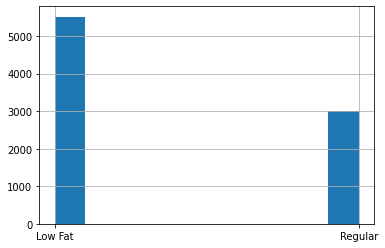

In [ ]:

sales['Item_Fat_Content'].hist()

<BarContainer object of 2 artists>

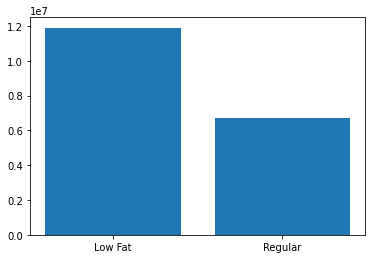

In [ ]:

# I didn't add labels and such since I don't expect these graphs to remain in the final.
plt.bar(item_fat_viz.index, item_fat_viz.values)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

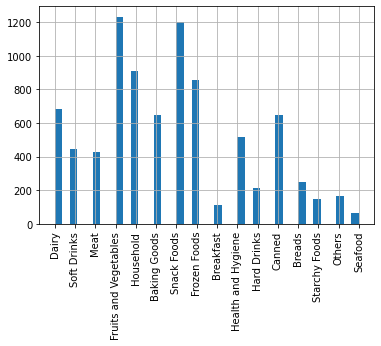

In [ ]:
item_type = sales.sort_values(by = 'Item_Type', ascending= False)
#item_type['Item_Type'].hist();
Fruits = sales['Item_Type'] == 'Fruits and Vegetables'

#sales['Item_Type'].hist()
#plt.xticks(rotation = 90)

Fruits = sales[Fruits]
#Fruits.tail(15)
#Fruits['Item_Type'].hist()

# Trying to make sure I understand what the histogram is showing me, I thought it was a straight count per item type
# upon plotting the fruits and veggies columns by itself and seeing a different bar height.  
#I noticed the bars were blended into each other and increased the bin count and now they are the same and each category has its own distinct bar.
sales['Item_Type'].hist(bins = 40)
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

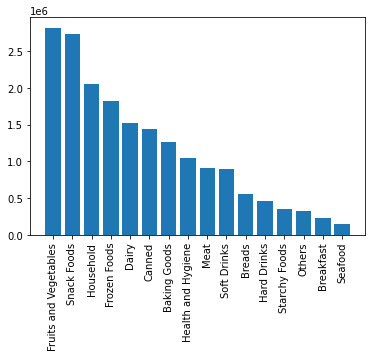

In [ ]:
plt.bar(item_type_viz.index, item_type_viz.values)
plt.xticks(rotation = 90)

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

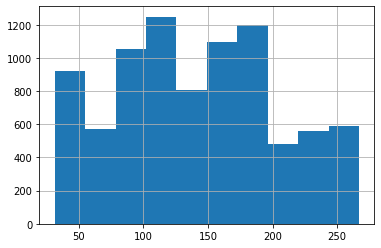

In [ ]:
# I'm not really sure how to interprety MRP by Sales.  I'm not sure if sales are a count of the number of sales per item type or 
# the gross/net dollar valuess of the sales per item type
# this histogram shows the distribution of MRP for the dataset 
sales['Item_MRP'].hist(bins = 10)
#same as box plot information with extras
sales['Item_MRP'].describe()

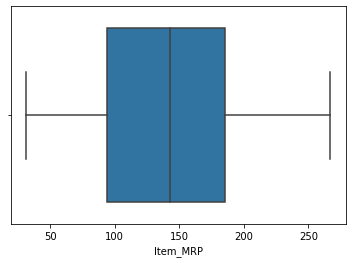

In [ ]:
sb.boxplot(x = sales['Item_MRP']);

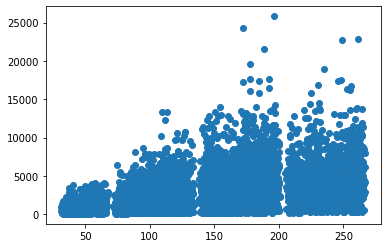

In [ ]:
# If sales is gross dollars then this shows that the higher the price the higher the gross/net $ value of sales which would be an incomplete story
# since there would be more proceeds per item sold, but I would also expect fewer items to be sold as dollar value increases. so the two should avg out
# if sales is count, this shows the higher the price the more of the item is sold which is defnitely contrary to expectation
# unless these are luxury grocery stores lol
plt.scatter(item_MRP_viz.index, item_MRP_viz.values)

count       8523
unique        10
top       OUT027
freq         935
Name: Outlet_Identifier, dtype: object

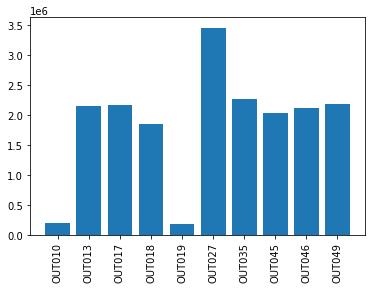

In [ ]:
plt.bar(item_ID_viz.index, item_ID_viz.values)
plt.xticks(rotation = 90)
# interesting this matches the bar chart but not the histogram
sales['Outlet_Identifier'].describe()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

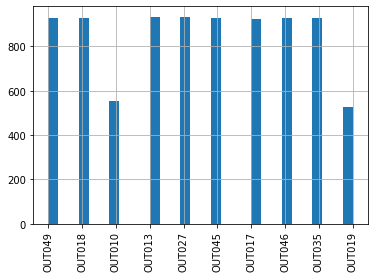

In [ ]:
# outlet 27 is the same for the histogram but higher for the bar chart against sales.
sales['Outlet_Identifier'].hist(bins = 30)
plt.xticks(rotation = 90)

<BarContainer object of 9 artists>

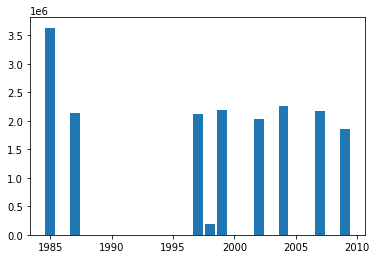

In [ ]:
plt.bar(item_estab_viz.index, item_estab_viz.values)

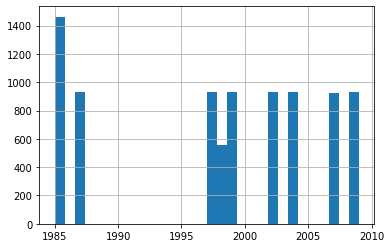

In [ ]:
# pretty consistent
sales['Outlet_Establishment_Year'].hist(bins = 30)

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

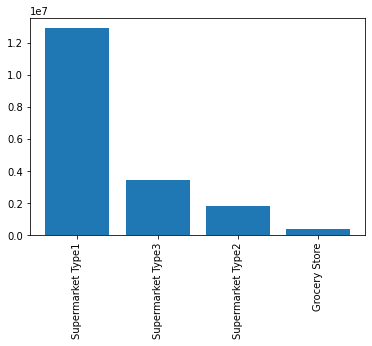

In [ ]:
# supermarket type 1 is way above other types but in the previous graph 1985 is way above. I thought grocery store and 1985 were strongly correlated
# maybe high quantity not necessarily high value?
plt.bar(item_otype_viz.index, item_otype_viz.values)
plt.xticks(rotation = 90)

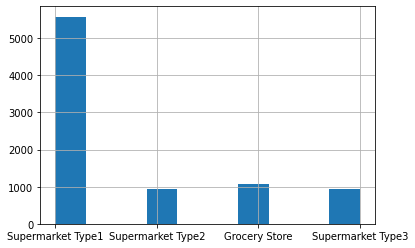

In [ ]:
sales['Outlet_Type'].hist()

Index([False, True], dtype='object', name='Missing_Item_Weight')


<BarContainer object of 2 artists>

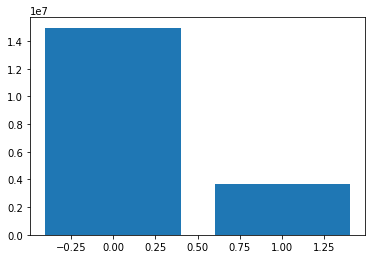

In [ ]:
#print(item_missing_viz.index)

plt.bar(item_missing_viz.index, item_missing_viz.values)

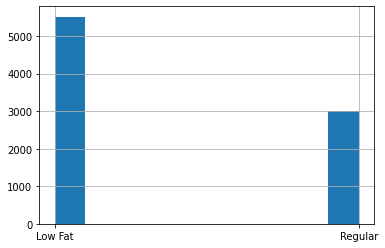

In [ ]:
sales['Item_Fat_Content'].hist()